<a href="https://colab.research.google.com/github/vinkrishna/ExpandingSenses/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept of Feature Engineering

To bring the concept of feature engineering to life, let's embark on a coding adventure! Imagine you have a dataset filled with brain signals. Your task is to extract features such as frequency, amplitude, and time characteristics from the data. By using specific Python libraries and functions, you can apply feature engineering techniques and observe how these features reveal valuable information about the brain.

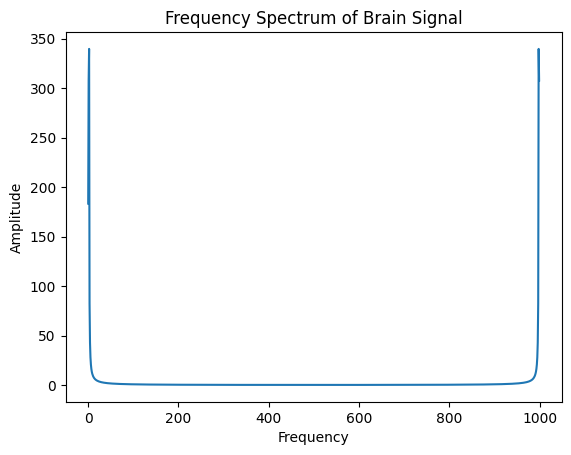

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Simulated brain signal data
brain_signal = np.sin(np.linspace(0, 10, 1000))

# Extracting frequency feature
frequency = fft(brain_signal)

# Plotting the frequency spectrum
plt.plot(abs(frequency))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Brain Signal')
plt.show()


By running this code, you have ploted the frequency spectrum of a simulated brain signal. The resulting plot will showcase the distribution of frequencies present in the signal, providing a glimpse into its unique characteristics.

Let's explore the same, with more complicated signal!

* Plotting the brain signal with specified x-axis (time series).

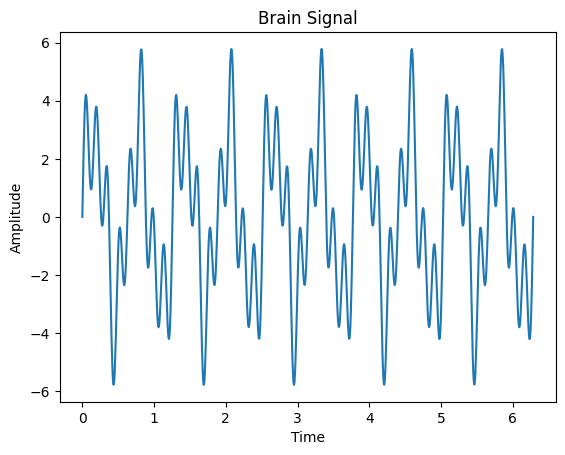

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Simulated brain signal data (more complicated)
frequencies = [10, 25, 40] # Frequency components to include in the signal
amplitudes = [3, 1, 2] # Amplitude of each frequency component
time_series = np.linspace(0, 2*np.pi, num=1000) # Time series (x-axis)
brain_signal = sum([amp * np.sin(freq * time_series) for freq, amp in zip(frequencies, amplitudes)])

# Extracting frequency feature using FFT
frequency = fft(brain_signal)

# Plotting the brain signal with specified x-axis (time series)
plt.figure() # Create a new figure to avoid overlapping old plots
plt.plot(time_series, brain_signal)  # Specify time series as the x-axis for plotting the brain signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Brain Signal')
plt.show()

This will give you a clearer visualization of how the signal varies over time. 📈👨‍💻

* Frequency Spectrum of Brain Signals

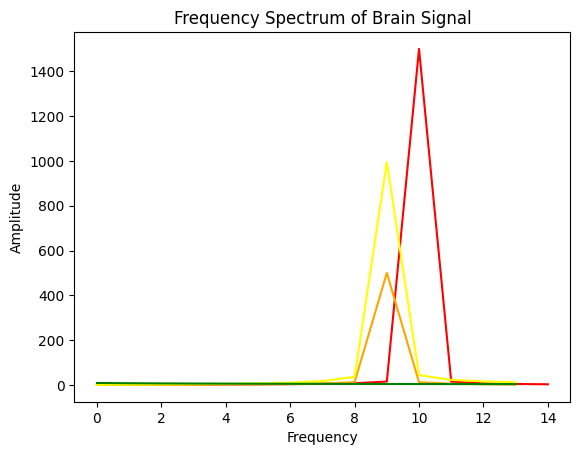

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Simulated brain signal data (more complicated)
frequencies = [10, 25, 40] # Frequency components to include in the signal
amplitudes = [3, 1, 2] # Amplitude of each frequency component
time_series = np.linspace(0, 2*np.pi, num=1000) # Time series (x-axis)
brain_signal = sum([amp * np.sin(freq * time_series) for freq, amp in zip(frequencies, amplitudes)])

# Extracting frequency feature using FFT
frequency = fft(brain_signal)

# Plotting the frequency spectrum with different colors for each frequency range
plt.figure() # Create a new figure to avoid overlapping old plots
plt.plot(abs(frequency[0:15]), color='red')  # Frequencies from 0-15 Hz (color: red)
plt.plot(abs(frequency[16:30]), color='orange')  # Frequencies from 16-30 Hz (color: orange)
plt.plot(abs(frequency[31:45]), color='yellow')  # Frequencies from 31-45 Hz (color: yellow)
plt.plot(abs(frequency[46:60]), color='green')  # Frequencies from 46-60 Hz (color: green)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Brain Signal')
plt.show()


In this code, We've added more frequency components to the signal (10 Hz, 25 Hz, and 40 Hz) with different amplitudes. The `frequencies` and `amplitudes` lists are used to generate a more complicated brain signal using summation of sinusoids.

The FFT is applied to the resulting signal, and each frequency range (0-15Hz, 16-30Hz, 31-45Hz, and 46-60Hz) is plotted with a different color to make it easier to visualize. This should give you a more visually appealing plot! Let me know if this works for you. 😊👨‍💻

## Feature Engineering: find features that distinguish between brain-activity looking at a cat or a dog.

Experiment with different feature combinations to improve the accuracy of classifying emotions based on brain activity